In [74]:
import pandas as pd
import numpy as np

import keras.backend as K
from keras.models import Model
from keras.layers import Bidirectional, LSTM, Input, Dense, GlobalMaxPool1D, Concatenate, Lambda

import matplotlib.pylab as plt

### Load data

In [10]:
train = pd.read_csv('data/mnist_data/train.csv')
test = pd.read_csv('data/mnist_data/test.csv')

In [11]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [13]:
train.columns, test.columns

(Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
        'pixel6', 'pixel7', 'pixel8',
        ...
        'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
        'pixel780', 'pixel781', 'pixel782', 'pixel783'],
       dtype='object', length=785),
 Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
        'pixel7', 'pixel8', 'pixel9',
        ...
        'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
        'pixel780', 'pixel781', 'pixel782', 'pixel783'],
       dtype='object', length=784))

In [82]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [53]:
index_list = []
labels = []
images = []

for data in train.itertuples():
    index_list.append(data[0])
    labels.append(data[1])
    
    temp = data[2:]
    temp = np.reshape(temp,(28,28))
    images.append(temp)
    
train_images = np.array(images)
train_images.shape, type(train_images)

((42000, 28, 28), numpy.ndarray)

1


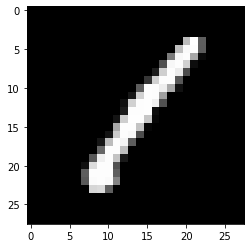

In [49]:
i = 0
print(labels[i])
plt.imshow(train_images[i], cmap = 'gray')

### Create model

In [63]:
D = 28
M = 15

In [66]:
input_ = Input(shape=(D,D))

## left-right
rnn1 = Bidirectional(LSTM(M, return_sequences=True))
x1 = rnn1(input_)
x1 = GlobalMaxPool1D()(x1)

In [75]:
## permutor
permutor = Lambda(lambda t: K.permute_dimensions(t, pattern=(0,2,1)))

In [83]:
## top-bottom
rnn2 = Bidirectional(LSTM(M, return_sequences=True))
x2 = permutor(input_)
x2 = rnn2(x2)
x2 = GlobalMaxPool1D()(x2)

concat = Concatenate(axis=1)
x = concat([x1, x2])

output = Dense(10, activation='softmax')(x)

model = Model(input=input_, output=output)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/Users/aishwaryamalgonde/Aishwarya/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [86]:
training = model.fit(train_images, labels, epochs=2, batch_size=32, validation_split=0.3)

Train on 29399 samples, validate on 12601 samples
Epoch 1/2
29399/29399 [==============================] - 38s 1ms/step - loss: 0.4347 - acc: 0.8772 - val_loss: 0.3919 - val_acc: 0.8873
Epoch 2/2
29399/29399 [==============================] - 38s 1ms/step - loss: 0.3589 - acc: 0.8961 - val_loss: 0.3410 - val_acc: 0.9005


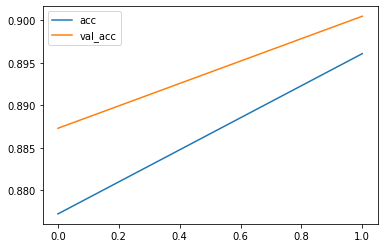

In [90]:
plt.plot(training.history['acc'], label='acc')
plt.plot(training.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

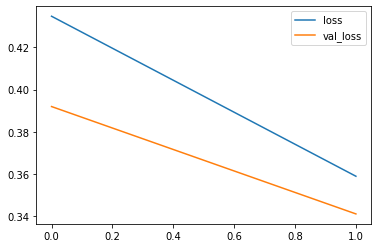

In [91]:
plt.plot(training.history['loss'], label='loss')
plt.plot(training.history['val_loss'], label='val_loss')
plt.legend()
plt.show()